In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

## AdaBoost classifier

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
num_col = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
cat_col = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']


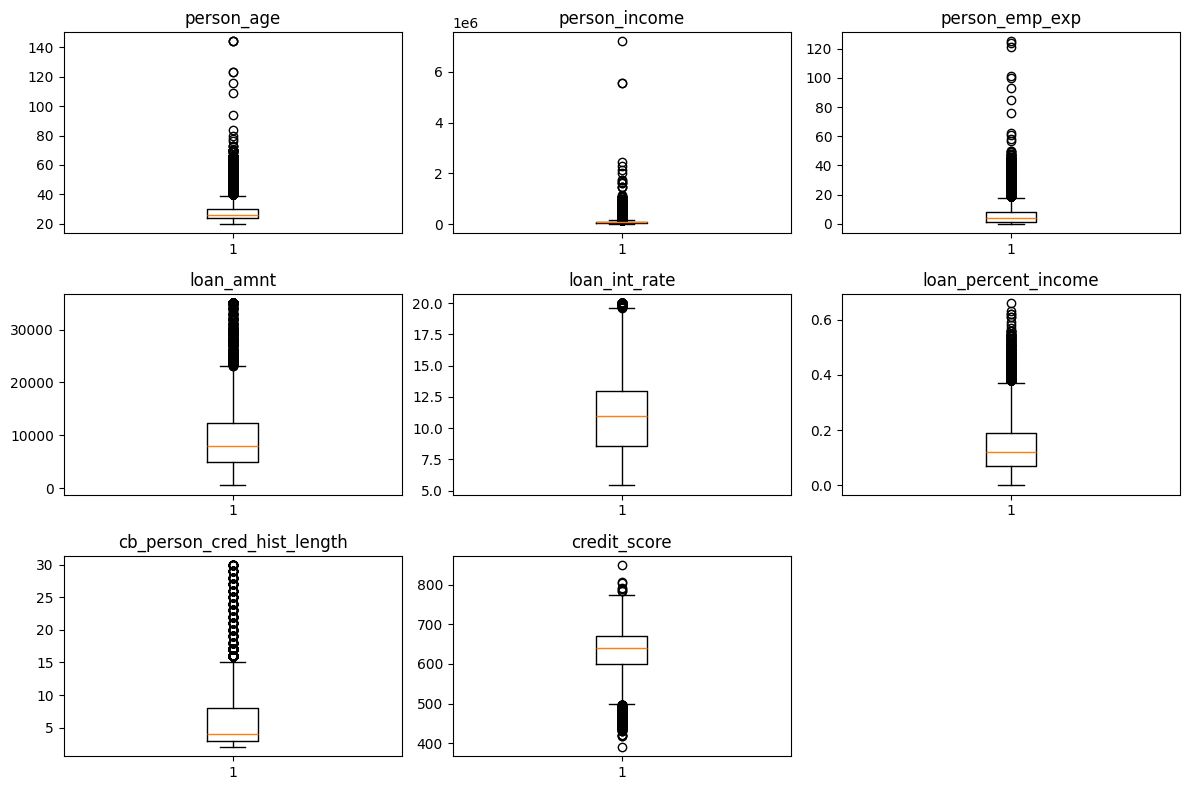

In [7]:
cols = 3
row = math.ceil(len(num_col)/cols)
plt.figure(figsize=(12,8))
for i,col in enumerate(num_col,1):
    plt.subplot(row, cols,i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [8]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True, dtype=int)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,1,0,0,1,0,0,1,0,0,0


In [26]:
x = df.drop(columns='loan_status')
y = df['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31500, 22), (13500, 22), (31500,), (13500,))

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score: ', acc)

accuracy_score:  0.9111851851851852


In [37]:
base_estimators = DecisionTreeClassifier(max_depth=2, random_state=42)

ada = AdaBoostClassifier(
    estimator= base_estimators,
    n_estimators=200,
    learning_rate=.7,
    random_state=42
)

ada.fit(x_train_scaled, y_train)

y_pred = ada.predict(x_test_scaled)

print('accuracy_score: ', accuracy_score(y_test, y_pred))


accuracy_score:  0.9102222222222223


## Grid search CV for best parameter

In [36]:
param_grid = {
    'n_estimators': [20,50,100,200],
    'learning_rate': [.1,.2, .3, .4, .5, .7],
    'estimator__max_depth' : [1,2]
}

grid = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=base_estimators,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid.fit(x_train, y_train)
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(x_test)

print('best parameters found: \n', grid.best_params_)

print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))

best parameters found: 
 {'estimator__max_depth': 2, 'learning_rate': 0.7, 'n_estimators': 200}

Test Accuracy (GridSearch AdaBoost): 0.9102222222222223


## ada boosting regression

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df = pd.get_dummies(df, columns=['sex', 'smoker','region'], dtype=int)

In [5]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
x = df.drop(columns=['charges'])
y = df['charges']


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((936, 11), (402, 11), (936,), (402,))

In [32]:
base_learner = DecisionTreeRegressor(max_depth=2,min_samples_leaf=5, random_state=42)

model = AdaBoostRegressor(
    estimator=base_learner,
    n_estimators=100,
    learning_rate=.3,
    loss='linear',
    random_state=42
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3893.2970953460663
MSE:  25785993.990284473
R2:  0.8241356132510858


In [33]:
grid_params = {
    'n_estimators' : [20, 50, 100, 150, 200],
    'learning_rate' : [.1, .2, .3,.4, .5, .6,.7],
    'loss' : ['linear', 'square','exponential'],
    'estimator__max_depth': [3, 4, 5]
}

grid = GridSearchCV(
    estimator= AdaBoostRegressor(
        estimator=base_learner,
        random_state=42
    ),
    param_grid=grid_params,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(x_test)

print('Best parameters found: \n', grid.best_params_)

print('\nr2 score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

Best parameters found: 
 {'estimator__max_depth': 4, 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 20}

r2 score:  0.8241356132510858
MAE:  3893.2970953460663
MSE:  25785993.990284473


In [35]:

important = model.feature_importances_


importance_df = pd.Series(
    important, index=x.columns
).sort_values(ascending=False)

importance_df.head(10)

smoker_yes          0.387128
smoker_no           0.318065
bmi                 0.189837
age                 0.103212
children            0.001758
sex_male            0.000000
sex_female          0.000000
region_northeast    0.000000
region_northwest    0.000000
region_southeast    0.000000
dtype: float64